# Next-Day Rain Prediction

Prepared by Marvin Rubia ([My LinkedIn](https://www.linkedin.com/in/marvinrubia08))


## About our dataset

The original source is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

This dataset contains observations of weather metrics for each day from 2008 to 2017 in Sydney, NSW. The __Weather_Data.csv__ dataset includes the following fields:

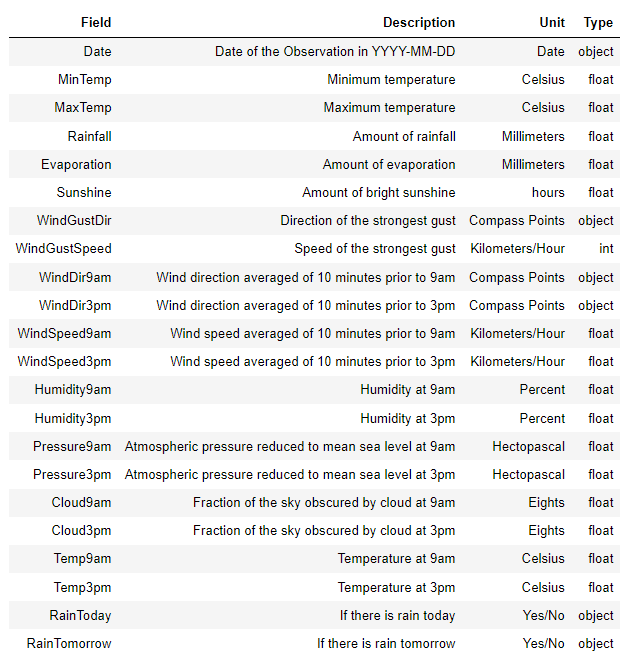

**Citation**: The .csv file was prepared by Joseph Santarcangelo, Ph.D and Svitlana Kramar. They are the instructors of IBM's course *Machine Learning with Python*.

## Import Libraries

In [76]:
# Data wrangling, analysis, and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Pre-modeling stage
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Modeling stage
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation stage
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

## LOAD AND UNDERSTAND THE DATASET

In [3]:
url = 'https://raw.githubusercontent.com/marvin-rubia/Next-Day-Rain-Prediction/main/Weather_Data.csv'
df = pd.read_csv(url)

In [4]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  WindSpeed3pm   3271 non-null   int64  
 12  Humidity9am    3271 non-null   int64  
 13  Humidity3pm    3271 non-null   int64  
 14  Pressure9am    3271 non-null   float64
 15  Pressure3pm    3271 non-null   float64
 16  Cloud9am       3271 non-null   int64  
 17  Cloud3pm       3271 non-null   int64  
 18  Temp9am 

In [6]:
# Check for rows with null values

condition_null = df.isnull().any(axis=1)
df[condition_null]

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


In [7]:
# Check for duplicated rows

condition_dupl = df.duplicated()
df[condition_dupl]

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


### Sidenote on **RainToday**

In [8]:
# Create dataframe for only RainToday and Rainfall columns
df_RToday_RF = df[['RainToday','Rainfall']]

# Show the least RainFall value for records of RainToday = 1
condition = df['RainToday'] == 'Yes'
df_RToday_RF[condition].sort_values(by='Rainfall', ascending=True)

,RainToday,Rainfall
403,Yes,1.2
104,Yes,1.2
1677,Yes,1.2
2544,Yes,1.2
1823,Yes,1.2
...,...,...
1707,Yes,95.2
1104,Yes,99.4
2484,Yes,105.8
1425,Yes,109.4


**Comment**: The dataset **confirms** a rain for the day if the amount of rainfall (in millimeters) is at least 1.2 mm.

### Balanced or imbalanced dataset?

In [9]:
# Compute distribution of our target variable

df['RainTomorrow'].value_counts()

No     2422
Yes     849
Name: RainTomorrow, dtype: int64

**Comment**: The positive class (raining tomorrow) accounts for 35% of the dataset. This means we have a moderately imbalanced dataset.

## DATA PRE-PROCESSING

### Replace categorical 'Yes' and 'No' with 1 and 0

In [10]:
df = df.replace(['Yes', 'No'], [1, 0])

In [11]:
# Check transformed values for RainToday

df['RainToday'].value_counts()

0    2422
1     849
Name: RainToday, dtype: int64

In [12]:
# Check transformed values for RainTomorrow

df['RainTomorrow'].value_counts()

0    2422
1     849
Name: RainTomorrow, dtype: int64

**NOTE**: Although both RainToday and RainTomorrow have the same distributions of 1s and 0s, they are not equal for every row of the dataset.

### Add a new column called 'Month'


Why add a Month column?

Answer: Because climate depends on months. Certain months are more susceptible to rainfall than other months.

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df.insert(1, 'Month', df['Date'].dt.month)
df.tail()

,Date,Month,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
3266,2017-06-21,6,8.6,19.6,0.0,2.0,7.8,SSE,37,W,...,73,52,1025.9,1025.3,2,2,10.5,17.9,0,0
3267,2017-06-22,6,9.3,19.2,0.0,2.0,9.2,W,30,W,...,78,53,1028.5,1024.6,2,2,11.0,18.7,0,0
3268,2017-06-23,6,9.4,17.7,0.0,2.4,2.7,W,24,WNW,...,85,56,1020.8,1015.0,6,6,10.2,17.3,0,0
3269,2017-06-24,6,10.1,19.3,0.0,1.4,9.3,W,43,W,...,56,35,1017.3,1015.1,5,2,12.4,19.0,0,0
3270,2017-06-25,6,7.6,19.3,0.0,3.4,9.4,W,35,W,...,73,32,1018.6,1015.4,1,1,9.4,18.8,0,0


### Sidenote: When is the rainy season in Sydney?

In [15]:
df_monthlyrain = df[['Month', 'Rainfall']].groupby('Month').mean().reset_index()
df_monthlyrain

,Month,Rainfall
0,1,3.150181
1,2,4.323922
2,3,4.483871
3,4,5.264906
4,5,2.434194
5,6,5.900690
6,7,2.867391
7,8,1.976952
8,9,1.733846
9,10,2.205344


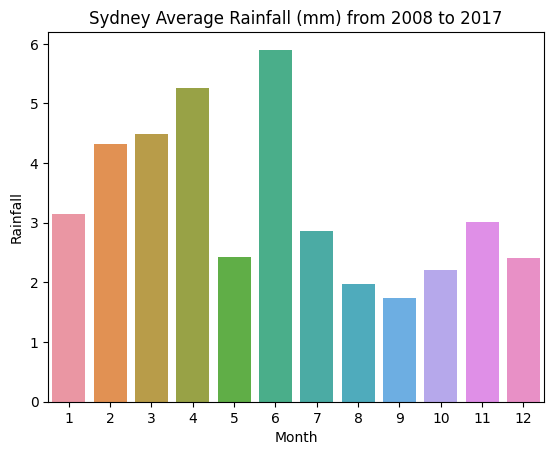

In [16]:
# Visualize rainfall vs. month

sns.barplot(data=df_monthlyrain, x='Month', y='Rainfall')
plt.title('Sydney Average Rainfall (mm) from 2008 to 2017')
plt.show()

**Comment**: Our dataset is aligned with the fact that Sydney's wettest months are from March to June.

### We can now delete the Date column as we no longer need it for modeling later.

In [17]:
df = df.drop('Date', axis=1)

## Convert categorical columns (with more than 2 values) into dummy variables

In [18]:
# Print column names for easy copy-pasting
df.columns

Index(['Month', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [19]:
cat_columns = ['Month', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

df = pd.get_dummies(df, columns=cat_columns, dtype=int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MinTemp          3271 non-null   float64
 1   MaxTemp          3271 non-null   float64
 2   Rainfall         3271 non-null   float64
 3   Evaporation      3271 non-null   float64
 4   Sunshine         3271 non-null   float64
 5   WindGustSpeed    3271 non-null   int64  
 6   WindSpeed9am     3271 non-null   int64  
 7   WindSpeed3pm     3271 non-null   int64  
 8   Humidity9am      3271 non-null   int64  
 9   Humidity3pm      3271 non-null   int64  
 10  Pressure9am      3271 non-null   float64
 11  Pressure3pm      3271 non-null   float64
 12  Cloud9am         3271 non-null   int64  
 13  Cloud3pm         3271 non-null   int64  
 14  Temp9am          3271 non-null   float64
 15  Temp3pm          3271 non-null   float64
 16  RainToday        3271 non-null   int64  
 17  RainTomorrow  

**Comment**: We now have 77 features that are ready for modeling.

## MACHINE LEARNING MODELING

### Separate Features and the Target

In [21]:
features = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

### Create training and testing sets

In [22]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=8)

print(len(X_train), ':', len(y_train))
print(len(X_test), ':', len(y_test))

2616 : 2616
655 : 655


### TRAINING MODELS

I have to scale the continuous variables using the StandardScaler **without** affecting the categorical columns. Thus, I need to separate continous and categorical from our training set.

### Separate continuous and categorical features sub-dataframes

In [23]:
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11', 'Month_12', 'WindGustDir_E', 'WindGustDir_ENE',
       'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE',
       'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE',
       'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W',
       'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE',
       'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE',
       'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE',
       'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W',
       'WindD

In [45]:
# Categorical features dataframe

X_train_categorical = X_train[['RainToday', 'Month_1', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Month_10', 'Month_11', 'Month_12', 'WindGustDir_E',
       'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
       'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S',
       'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW',
       'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW',
       'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N',
       'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW',
       'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE', 'WindDir9am_SSW',
       'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW',
       'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N',
       'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW', 'WindDir3pm_NW',
       'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW',
       'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW']]

X_train_categorical.tail()

,RainToday,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
2181,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2409,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2033,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1364,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
451,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


NOTE: The indices are retained after the train test split, which randomly selected 80% of the dataset for training.

In [44]:
# Numerical features dataframe

X_train_numerical = X_train[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                  'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                  'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
                  'Cloud3pm', 'Temp9am', 'Temp3pm']]

X_train_numerical.tail()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
2181,10.3,17.2,0.2,2.6,1.2,54,13,22,65,49,1008.9,1008.3,7,7,13.0,16.9
2409,17.6,25.6,0.2,4.2,7.8,31,9,15,80,53,1027.7,1026.2,7,7,20.5,23.6
2033,19.3,28.7,0.0,10.6,13.1,52,7,22,65,51,1012.6,1009.4,0,0,25.1,28.3
1364,18.5,22.4,0.8,6.6,3.4,56,24,28,75,57,1015.1,1016.4,5,4,19.3,21.5
451,11.0,17.4,6.2,2.4,2.7,41,17,4,92,88,1020.5,1020.4,7,7,12.8,14.1


### Standardization of numerical features from the training set

In [46]:
scaler = StandardScaler()

In [47]:
# NOTE: It is important that we retain the indices because each index corresponds to a date from our original dataset
# Each row must preserve the information for each day (although some features for that row will be scaled)

orig_indices = X_train_numerical.index
orig_indices

Int64Index([1450,  512, 2744, 2473, 2183, 1649, 1278,  257,  147, 1914,
            ...
            2096, 1384, 2899, 2184,  986, 2181, 2409, 2033, 1364,  451],
           dtype='int64', length=2616)

In [48]:
scaled_array = scaler.fit_transform(X_train_numerical)
X_nums_scaled = pd.DataFrame(scaled_array, columns=X_train_numerical.columns, index=orig_indices)

X_nums_scaled.tail()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
2181,-0.996134,-1.285959,-0.318300,-0.943062,-1.568282,1.139407,-0.292060,0.357184,-0.205472,-0.341378,-1.357852,-1.112921,1.071357,1.173649,-0.982053,-1.075923
2409,0.608557,0.586696,-0.318300,-0.359240,0.154271,-0.966763,-0.860216,-0.578814,0.794245,-0.096221,1.330023,1.447000,1.071357,1.173649,0.556264,0.488348
2033,0.982253,1.277795,-0.337697,1.976049,1.537534,0.956262,-1.144294,0.357184,-0.205472,-0.218799,-0.828855,-0.955607,-1.698079,-1.712714,1.499765,1.585673
1364,0.806396,-0.126696,-0.260112,0.516493,-0.994098,1.322552,1.270370,1.159468,0.461006,0.148935,-0.471425,0.045479,0.280089,-0.063364,0.310133,-0.001946
451,-0.842260,-1.241372,0.263582,-1.016040,-1.176793,-0.051037,0.276097,-2.049669,1.594019,2.048899,0.300624,0.617528,1.071357,1.173649,-1.023075,-1.729648


### Combine X_nums_scaled to X_train_categorical to finalize our training features dataframe

In [51]:
X_train_scaled = pd.concat([X_nums_scaled, X_train_categorical], axis=1, join='inner')

In [59]:
X_train_scaled.tail()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
2181,-0.996134,-1.285959,-0.318300,-0.943062,-1.568282,1.139407,-0.292060,0.357184,-0.205472,-0.341378,...,0,0,0,0,0,0,0,0,0,1
2409,0.608557,0.586696,-0.318300,-0.359240,0.154271,-0.966763,-0.860216,-0.578814,0.794245,-0.096221,...,0,0,0,0,0,0,0,0,0,0
2033,0.982253,1.277795,-0.337697,1.976049,1.537534,0.956262,-1.144294,0.357184,-0.205472,-0.218799,...,0,0,0,0,0,0,0,0,0,0
1364,0.806396,-0.126696,-0.260112,0.516493,-0.994098,1.322552,1.270370,1.159468,0.461006,0.148935,...,0,0,0,0,1,0,0,0,0,0
451,-0.842260,-1.241372,0.263582,-1.016040,-1.176793,-0.051037,0.276097,-2.049669,1.594019,2.048899,...,0,0,0,0,0,0,0,0,0,1


In [60]:
# Print number of rows for our finalized training set (it must be 2616)

len(X_train_scaled)

2616

### Train 5 ML Classifiers

1. K-Nearest Neighbors (KNN)

In [61]:
# Create our KNN model

knn = KNeighborsClassifier()

# Find the best n_neighbors parameter using GridSearchCV

param_grid_knn = {'n_neighbors': list(range(1,51))}

grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5)

grid_search_knn.fit(X_train_scaled, y_train)

# Print the best parameter and accuracy score
print("Best k:", grid_search_knn.best_params_['n_neighbors'])
print("Best score:", grid_search_knn.best_score_)

# Assign the best KNN model
knn_final = grid_search_knn.best_estimator_
knn_final

Best k: 35
Best score: 0.8344846963350021


KNeighborsClassifier(n_neighbors=35)

2. Logistic Regression (LR)

In [62]:
# Create our Logistic Regression model

log_reg = LogisticRegression(solver='liblinear')

# Find the best C parameter using GridSearchCV

param_grid_LR = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_LR = GridSearchCV(log_reg, param_grid_LR, cv=5)

grid_search_LR.fit(X_train_scaled, y_train)

# Print the best parameter and accuracy score

print("Best C:", grid_search_LR.best_params_['C'])
print("Best score:", grid_search_LR.best_score_)

# Assign the best Logistic Regression model

log_reg_final = grid_search_LR.best_estimator_
log_reg_final

Best C: 0.1
Best score: 0.8383080583246976


LogisticRegression(C=0.1, solver='liblinear')

3. Support Vector Machine (SVM)

In [63]:
# Create our SVM model

svm = SVC(probability=True)

# Find the best C parameter using GridSearchCV

param_grid_svm = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5)

grid_search_svm.fit(X_train_scaled, y_train)

# Print the best parameter and accuracy score

print('Best C:', grid_search_svm.best_params_['C'])
print('Best score:', grid_search_svm.best_score_)

# Assign the best SVM model

svm_final = grid_search_svm.best_estimator_
svm_final

Best C: 1
Best score: 0.8405981346605753


SVC(C=1, probability=True)

4. Decision Tree Classifier (DTC)

In [64]:
# Create our DTC model

dtc = DecisionTreeClassifier()

# Find the best max_depth parameter using GridSearchCV

param_grid_dtc = {'max_depth': list(range(3, 31))}

grid_search_dtc = GridSearchCV(dtc, param_grid_dtc, cv=5)

grid_search_dtc.fit(X_train_scaled, y_train)

# Print the best parameter and accuracy score

print('Best max_depth:', grid_search_dtc.best_params_['max_depth'])
print('Best score:', grid_search_dtc.best_score_)

# Assign our best DTC model

dtc_final = grid_search_dtc.best_estimator_
dtc_final

Best max_depth: 3
Best score: 0.8253083356443301


DecisionTreeClassifier(max_depth=3)

5. Random Forest Classifier (RFC)

In [65]:
# Create our RFC model

rfc = RandomForestClassifier(random_state=8)

# Find the best max_depth parameter using GridSearchCV

param_grid_rfc = {'max_depth': list(range(3,31))}

grid_search_rfc = GridSearchCV(rfc, param_grid_rfc, cv=5)

grid_search_rfc.fit(X_train_scaled, y_train)

# Print the best parameter and accuracy score

print('Best max_depth:', grid_search_rfc.best_params_['max_depth'])
print('Best score:', grid_search_rfc.best_score_)

# Assign our best rf model

rfc_final = grid_search_rfc.best_estimator_
rfc_final

Best max_depth: 12
Best score: 0.8459533227270738


RandomForestClassifier(max_depth=12, random_state=8)

### EVALUATING OUR MODELS

Just like what we did for the training set, we need to scale our features of the testing set first, before evaluating our models to it.

### Make a properly scaled test set

In [54]:
# Categorical features dataframe

X_test_categorical = X_test[['RainToday', 'Month_1', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Month_10', 'Month_11', 'Month_12', 'WindGustDir_E',
       'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
       'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S',
       'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW',
       'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW',
       'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N',
       'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW',
       'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE', 'WindDir9am_SSW',
       'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW',
       'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N',
       'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW', 'WindDir3pm_NW',
       'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW',
       'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW']]

X_test_categorical.tail()

,RainToday,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
3001,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
702,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1288,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1552,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
# Numerical features dataframe

X_test_numerical = X_test[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                  'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                  'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
                  'Cloud3pm', 'Temp9am', 'Temp3pm']]

X_test_numerical.tail()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
3001,10.9,23.2,0.0,6.2,9.7,61,20,26,37,22,1009.7,1006.8,2,2,18.6,20.6
1671,15.7,22.0,0.0,5.4,5.2,30,13,17,59,55,1020.3,1018.5,7,7,18.7,20.5
702,22.1,25.8,0.0,8.6,7.8,41,11,24,64,60,1019.4,1016.1,6,3,24.2,25.8
1288,13.5,23.5,0.0,8.0,12.4,48,6,22,100,50,1028.0,1023.5,5,4,18.0,23.0
1552,9.0,18.2,0.0,5.0,10.0,46,9,17,52,33,1016.9,1016.9,1,1,12.2,17.8


In [56]:
def make_scaled_test_set(df_num, df_cat):
  '''A function that recycles the codes we did for training set, to scale our testing set'''

  # Get the index for each row of numerical dataframe
  orig_indices = df_num.index

  # Scale our numerical dataframe
  scaler = StandardScaler()
  scaled_array = scaler.fit_transform(df_num)
  X_nums_scaled = pd.DataFrame(scaled_array, columns=df_num.columns, index=orig_indices)

  # Combine the scaled numerical df and the categorical df
  X_test_scaled = pd.concat([X_nums_scaled, df_cat], axis=1, join='inner')

  return X_test_scaled

In [57]:
X_test_scaled = make_scaled_test_set(df_num=X_test_numerical, df_cat=X_test_categorical)
X_test_scaled.tail()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
3001,-0.910285,0.010213,-0.342537,0.375201,0.718244,1.921901,0.686302,0.931749,-2.073178,-2.061796,...,0,0,0,0,0,0,0,0,0,1
1671,0.140314,-0.258256,-0.342537,0.091785,-0.483041,-1.079960,-0.306346,-0.293744,-0.642818,-0.013174,...,0,0,0,0,0,0,0,0,0,0
702,1.541112,0.591894,-0.342537,1.225447,0.211035,-0.014784,-0.589960,0.659417,-0.317736,0.297223,...,0,0,0,0,0,0,0,0,0,0
1288,-0.341211,0.077330,-0.342537,1.012886,1.439015,0.663056,-1.298994,0.387085,2.022852,-0.323571,...,0,0,0,0,0,0,0,0,0,0
1552,-1.326147,-1.108405,-0.342537,-0.049922,0.798330,0.469387,-0.873574,-0.293744,-1.097933,-1.378922,...,0,0,0,0,0,0,0,0,0,1


### Evaluate our KNN model

In [66]:
y_pred_knn = knn_final.predict(X_test_scaled)

report = classification_report(y_test, y_pred_knn)

print(report)

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       477
           1       0.84      0.46      0.59       178

    accuracy                           0.83       655
   macro avg       0.83      0.71      0.74       655
weighted avg       0.83      0.83      0.81       655



### Evaluate our LR model

In [67]:
y_pred_lr = log_reg_final.predict(X_test_scaled)

report = classification_report(y_test, y_pred_lr)

print(report)

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       477
           1       0.76      0.59      0.66       178

    accuracy                           0.84       655
   macro avg       0.81      0.76      0.78       655
weighted avg       0.83      0.84      0.83       655



### Evaluate our SVM model

In [68]:
y_pred_svm = svm_final.predict(X_test_scaled)

report = classification_report(y_test, y_pred_svm)

print(report)

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       477
           1       0.82      0.54      0.65       178

    accuracy                           0.84       655
   macro avg       0.83      0.75      0.78       655
weighted avg       0.84      0.84      0.83       655



### Evaluate our DTC model

In [69]:
y_pred_dtc = dtc_final.predict(X_test_scaled)

report = classification_report(y_test, y_pred_dtc)

print(report)

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       477
           1       0.72      0.50      0.59       178

    accuracy                           0.81       655
   macro avg       0.78      0.71      0.73       655
weighted avg       0.80      0.81      0.80       655



### Evaluate our RFC model

In [70]:
y_pred_rfc = rfc_final.predict(X_test_scaled)

report = classification_report(y_test, y_pred_rfc)

print(report)

              precision    recall  f1-score   support

           0       0.84      0.96      0.89       477
           1       0.82      0.51      0.63       178

    accuracy                           0.84       655
   macro avg       0.83      0.73      0.76       655
weighted avg       0.83      0.84      0.82       655



## COMPARING OUR MODELS

Since we have an imbalanced dataset we need to use weighted f1-score as basis of performance comparison (instead of accuracy). In case of a tie, we will use weighted recall. Why use recall? Because in rain prediction, it is important to minimize false negative rate. If we forecast NOT raining tomorrow, people won't bring umbrellas, so we better be confident for a negative forecast.

In [75]:
data = {'LR': [0.83, 0.84],
    'SVM': [0.83, 0.84],
    'RFC': [0.82, 0.84],
    'KNN': [0.81, 0.83],
    'DTC': [0.80, 0.81]
}

scores = pd.DataFrame(data)
scores.index = ['weighted f1', 'weighted recall']

scores

,LR,SVM,RFC,KNN,DTC
weighted f1,0.83,0.83,0.82,0.81,0.80
weighted recall,0.84,0.84,0.84,0.83,0.81


**Comment**: LR and SVM are tied in our primary metrics. They are also tied in terms of accuracy.

Let's check if they are still tied at ROC-AUC metric, which is also used for comparing models for binary classfication task with imbalanced dataset.

In [77]:
# ROC-AUC for our LR model

y_pred_lr_proba = log_reg_final.predict_proba(X_test_scaled)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_lr_proba)

print('ROC-AUC score:', roc_auc)

ROC-AUC score: 0.8659694250111888


In [78]:
# ROC-AUC for our SVM model

y_pred_svm_proba = svm_final.predict_proba(X_test_scaled)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_svm_proba)

print('ROC-AUC score:', roc_auc)

ROC-AUC score: 0.8600098932937603


**Comment**: Our LR model beats our SVM model slightly.

### Create a Confusion Matrix for our best model

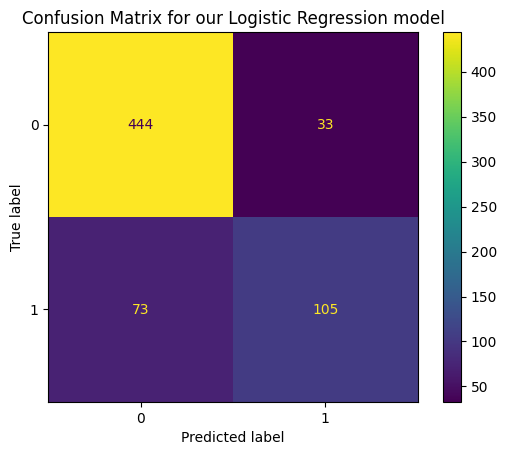

In [80]:
# Create the confusion matrix for our Logistic Regression model

cm = confusion_matrix(y_test, y_pred_lr)

cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

plt.title('Confusion Matrix for our Logistic Regression model')
plt.show()

## CONCLUSION

Out of the five models developed for Sydney's historical weather data from 2008 to 2017, our best model for predicting next-day rain is **Logistic Regression** (C=0.1, solver='liblinear', the rest of the parameters are default). Its weighted f1-score is 0.830, its weighted recall is 0.840, and its ROC-AUC score is 0.866. Decision Tree (max_depth=3, the rest of the parameters are default) performed the weakest.

Weather forecasts are accompanied by probability and our logistic regression model can readily give the probability of rain tomorrow using the `.predict_proba()` method from sci-kit learn.